In [ ]:
#!pip install --upgrade pandas

In [1]:
import pandas as pd
import numpy as np
from quanqual import QUANQUAL


In [5]:
dataset=pd.read_csv('placement.csv')

In [6]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [10]:
dataset['salary'].fillna(0,inplace=True)

C:\Users\Pravin\AppData\Local\Temp\ipykernel_15856\3738702580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salary'].fillna(0,inplace=True)


In [11]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
quan,qual=QUANQUAL.QuanQual(dataset)

In [ ]:
quan

In [ ]:
dir(dataset)

In [26]:
dataset.corr()

ValueError: could not convert string to float: 'M'

In [25]:
dataset.cov()

ValueError: could not convert string to float: 'M'

In [12]:
dataset.drop('sl_no',inplace=True,axis=1)

In [13]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [14]:
import seaborn as sns

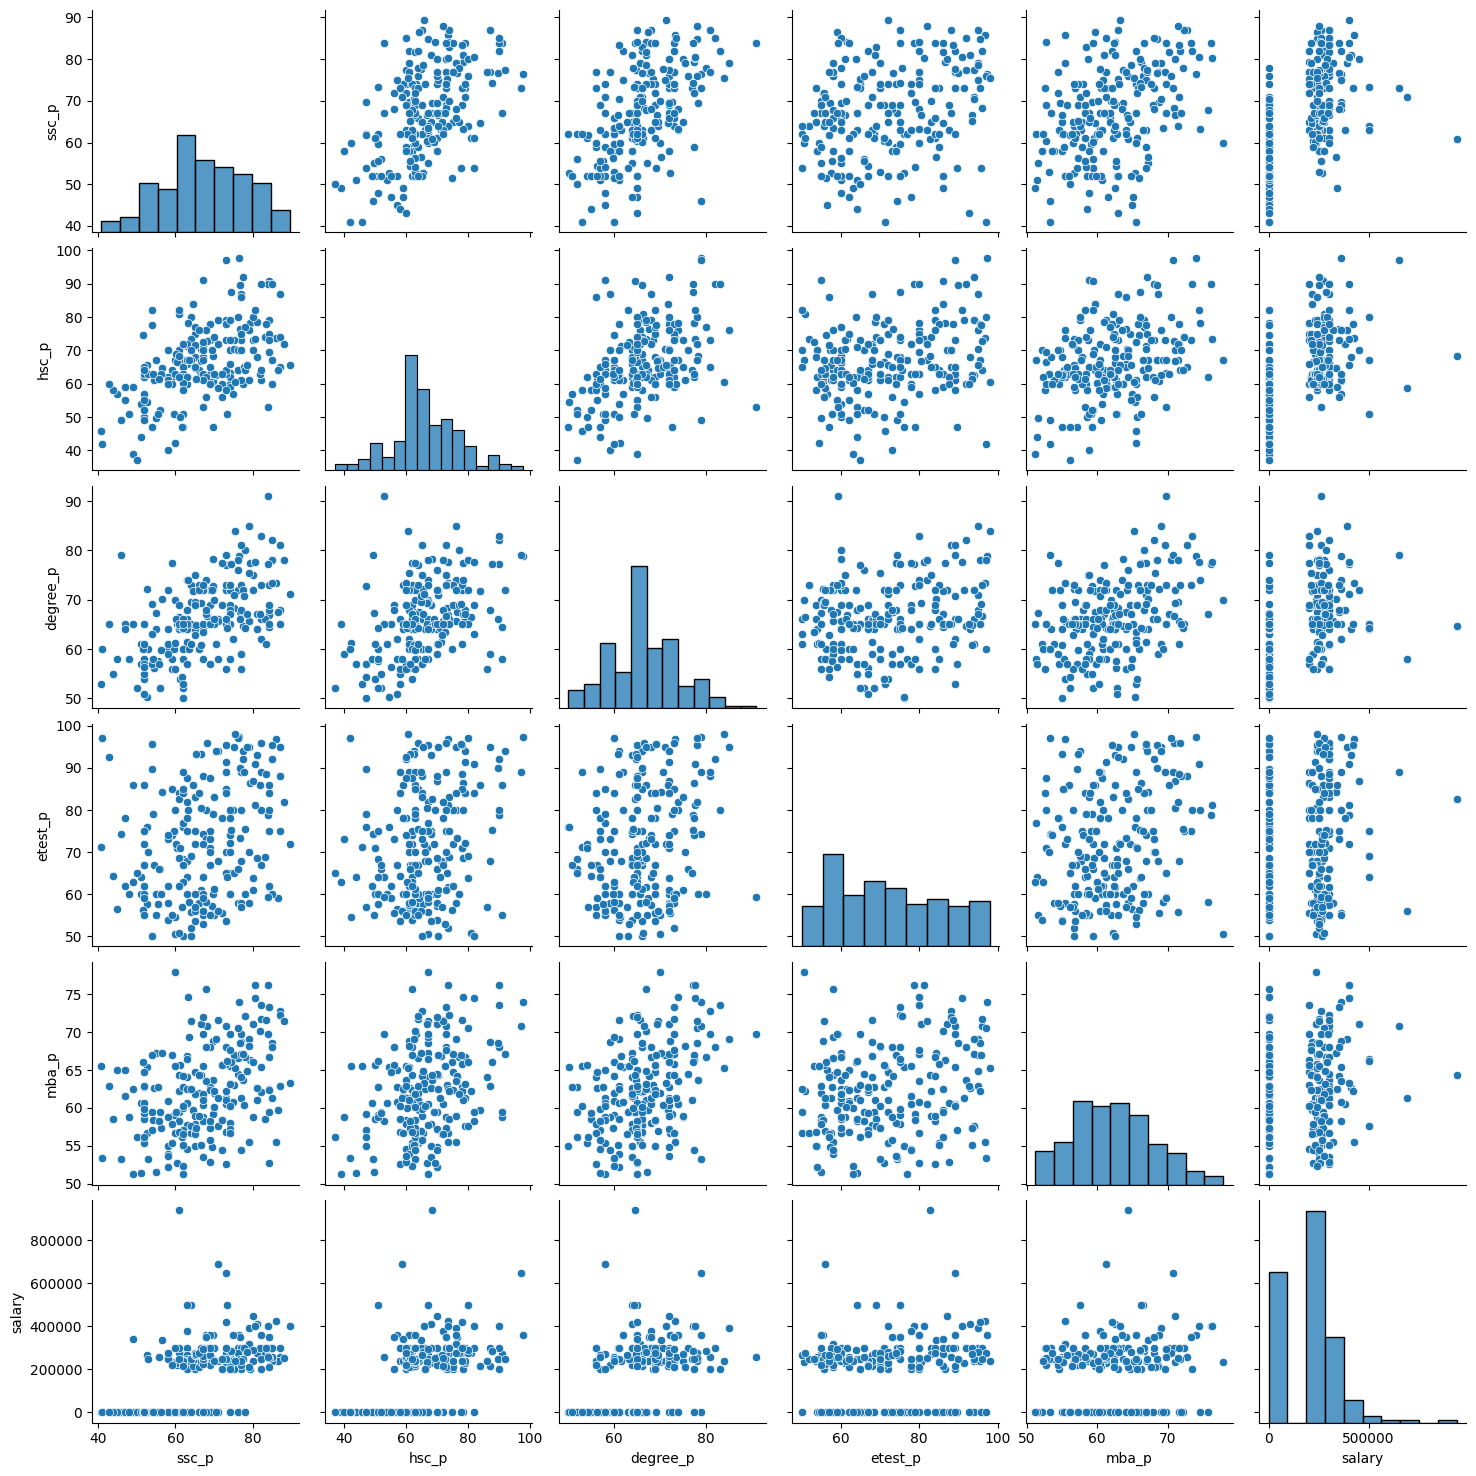

In [15]:
sns.pairplot(dataset)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
    # calculate VIF
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return(vif)

In [20]:
quan,qual=QUANQUAL.QuanQual(dataset)

In [21]:
cal_vif(dataset[quan])

,variables,VIF
0,ssc_p,76.496603
1,hsc_p,58.972066
2,degree_p,113.299298
3,etest_p,32.679659
4,mba_p,114.025972
5,salary,3.931112


In [23]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['salary']
female=dataset[dataset['gender']=='F']['salary']
#print(male)
ttest_ind(male,female)

TtestResult(statistic=2.1103433958668765, pvalue=0.03599560646745178, df=213.0)

In [24]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['ssc_p']
female=dataset[dataset['gender']=='M']['hsc_p']
#print(male)
ttest_rel(male,female)

TtestResult(statistic=0.6852881050898076, pvalue=0.49431164600731514, df=138)